# Linear Regression Analysis Tutorial – Polynomial Regression

**Creator: Muhammad Bilal Alam**

## What is Polynomial Regression?

Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial. The formula for a polynomial regression model of degree n can be written as:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \varepsilon
$$


Where:

- **y** is the dependent variable  
- **x** is the independent variable  
- **β₀, β₁, β₂, ..., βₙ** are the coefficients of the polynomial regression model  
- **ε** is the error term or the residual  
- **n** is the degree of the polynomial  

The goal of polynomial regression is to find the values of the coefficients β₀, β₁, β₂, ..., βₙ that minimize the sum of squared errors between the predicted values of y and the actual values of y.


## The California Housing Dataset for Multiple Linear Regression

The California Housing Dataset contains information on the median income, housing age, and other features for census tracts in California. The dataset was originally published by Pace, R. Kelley and Ronald Barry in their 1997 paper *"Sparse Spatial Autoregressions"* and is available in the `sklearn.datasets` module.

The dataset consists of 20,640 instances, each representing a census tract in California.

There are eight features in the dataset, including:

- **MedInc**: Median income in the census tract.  
- **HouseAge**: Median age of houses in the census tract.  
- **AveRooms**: Average number of rooms per dwelling in the census tract.  
- **AveBedrms**: Average number of bedrooms per dwelling in the census tract.  
- **Population**: Total number of people living in the census tract.  
- **AveOccup**: Average number of people per household in the census tract.  
- **Latitude**: Latitude of the center of the census tract.  
- **Longitude**: Longitude of the center of the census tract.


### Step 1: Import the necessary libraries


In [1]:
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import numpy as np  # For numerical operations on arrays and matrices
import matplotlib.pyplot as plt  # For basic plotting and visualizations

from sklearn.datasets import fetch_california_housing  # To load the California housing dataset
from sklearn.linear_model import LinearRegression  # For applying linear regression models
from sklearn.preprocessing import StandardScaler  # To normalize or standardize features
from sklearn.preprocessing import PolynomialFeatures  # To generate polynomial and interaction features
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using cross-validation

import warnings  # To handle and suppress warnings
warnings.filterwarnings('ignore')  # Suppress unnecessary warning messages

### Step 2: Load the dataset

In [2]:
# Load the California Housing Dataset from seaborn
california = fetch_california_housing()

# Convert the data to a pandas dataframe
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)

# Add the target variable to the dataframe
california_df['MedHouseVal'] = california.target

# Print the first 5 rows of the dataframe
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Do Data Preprocessing along with Data Exploratory Analysis

### Step 3(a): Check Shape of DataFrame
Checking the shape of the DataFrame tells how many rows and columns we have in the dataset.


In [3]:
# Print the shape of the dataframe
print("Data shape:", california_df.shape)

Data shape: (20640, 9)


In [4]:
# Display basic information about the dataframe
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Step 3(c): Show Descriptive Statistics of Each Numerical Column

Looking at descriptive statistics in machine learning is important because it gives an overview of the dataset’s distribution and key characteristics. Some of the reasons why we should look at descriptive statistics include:

- **Understanding the distribution of data**: Descriptive statistics provide information about the central tendency and the spread of the data. This information is useful in determining the type of distribution and whether the data is skewed or symmetrical.

- **Identifying outliers**: Descriptive statistics help to identify any extreme values or outliers in the dataset. These outliers can have a significant impact on the analysis and should be investigated further.

From the descriptive statistics, we can observe the following:

- **Outliers**: The 'AveRooms', 'AveBedrms', 'Population', and 'AveOccup' columns have high maximum values, indicating the presence of outliers in the data. These outliers may need to be treated or removed before model selection.

- **Distribution**: The 'MedInc', 'HouseAge', and 'MedHouseVal' columns appear to be normally distributed, as the mean and median values are close to each other, and the standard deviation is not very high. The 'Latitude' column is skewed to the left, as the mean is less than the median. The 'Longitude' column is skewed to the right, as the mean is greater than the median.


In [5]:
# View descriptive statistics for all features (transposed for readability)
california_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Step 3(d): Check for Missing Values in the DataFrame

This is important because most machine learning algorithms cannot handle missing data and will throw an error if missing values are present. Therefore, it is necessary to check for missing values and impute or remove them before fitting the data into a machine learning model. This helps to ensure that the model is trained on complete and accurate data, which leads to better performance and more reliable predictions.

Here we have no missing values so let’s move on.

In [6]:
# Check for missing values
print("Missing values:\n", california_df.isnull().sum())

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### Step 3(e): Check for Duplicate Values in the DataFrame

Checking for duplicate values in machine learning is important because it can affect the accuracy of your model. Duplicate values can skew your data and lead to overfitting, where your model is too closely fit to the training data and does not generalize well to new data.

We have no duplicate values so that’s good.

In [7]:
# Check for duplicate values
california_df.duplicated().sum()

0

### Step 3(f)(i): Check for Outliers in the DataFrame

We should check for outliers as they can have a negative impact on machine learning algorithms as they can skew the results of the analysis. Outliers can significantly alter the mean, standard deviation, and other statistical measures, which can misrepresent the true characteristics of the data. Linear regression models are sensitive to outliers and can produce inaccurate results if the outliers are not properly handled or removed. Therefore, it is important to identify and handle outliers appropriately to ensure the accuracy and reliability of the models.

Here in the plots we can clearly see very high outliers on the right-hand side. So we need to deal with them appropriately.

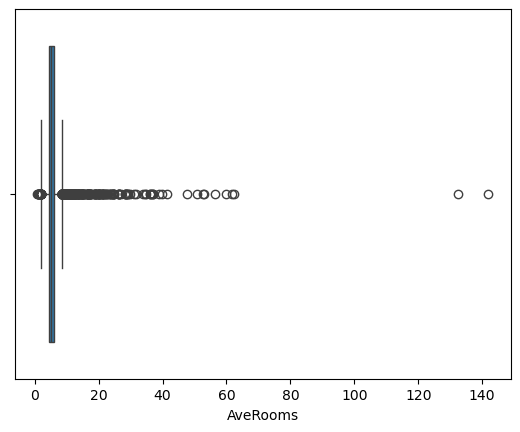

In [8]:
# Create a boxplot of the 'AveRooms' column to visualize outliers
ax = sns.boxplot(x=california_df['AveRooms'])

### Step 3(f)(ii): Visualize Outliers with Boxplots

Boxplots are a useful way to visually detect outliers in numerical columns. The right-side tail or extreme points in a boxplot typically indicate potential outliers. In this section, we will generate boxplots for the `AveBedrms` and `Population` columns.

To improve readability, the y-axis values will be scaled and customized.

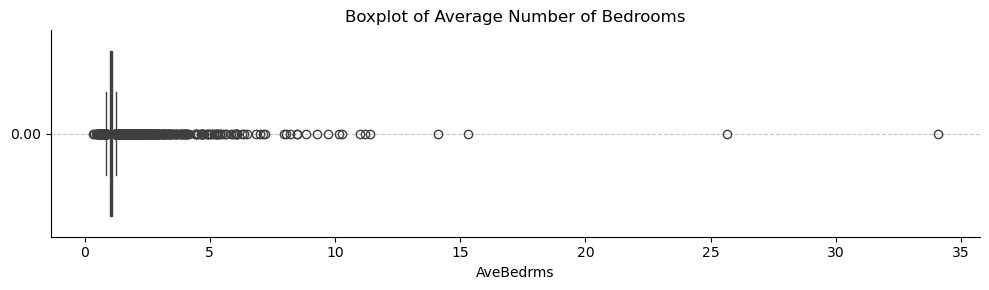

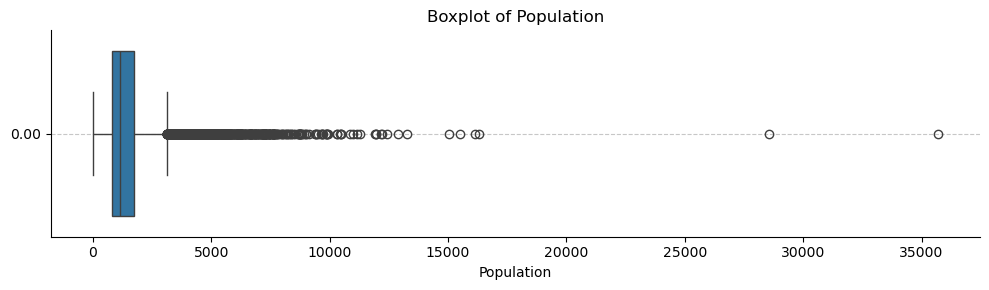

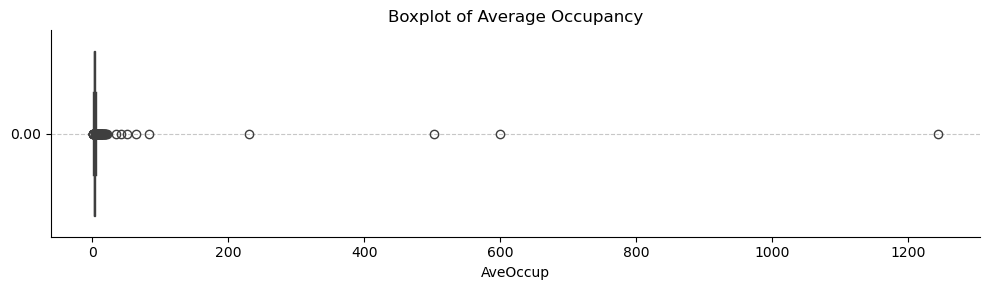

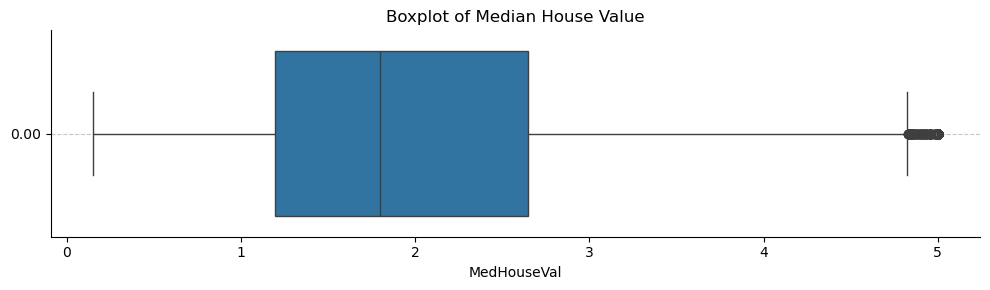

In [9]:
# Define reusable boxplot function with spacing
def plot_boxplot_in_millions(df, column, title=None):
    plt.figure(figsize=(10, 3))  # Adjust width and height for each plot
    ax = sns.boxplot(x=df[column])
    ax.set_title(title or f'Boxplot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('')
    
    # Convert yticks to NumPy array for formatting
    yticks = np.array(ax.get_yticks())
    ax.set_yticklabels(['{:.2f}'.format(ytick / 1_000_000) for ytick in yticks])
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

# Generate boxplots for selected columns
columns_to_plot = [
    ('AveBedrms', 'Boxplot of Average Number of Bedrooms'),
    ('Population', 'Boxplot of Population'),
    ('AveOccup', 'Boxplot of Average Occupancy'),
    ('MedHouseVal', 'Boxplot of Median House Value')
]

for col, title in columns_to_plot:
    plot_boxplot_in_millions(california_df, col, title)

### Step 3(f)(ii): Handle Outliers using Winsorization

To address extreme values that can skew analysis, we apply **Winsorization**. This involves capping values below the 1st percentile and above the 99th percentile (or using IQR bounds). The goal is to reduce the influence of extreme outliers without removing data entirely.


In [10]:
# Apply Winsorization using IQR method
winsorized_df = california_df.copy()

for column in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']:
    Q1 = winsorized_df[column].quantile(0.25)
    Q3 = winsorized_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize the values
    winsorized_df[column] = np.where(
        winsorized_df[column] < lower_bound, 
        lower_bound, 
        np.where(
            winsorized_df[column] > upper_bound, 
            upper_bound, 
            winsorized_df[column]
        )
    )

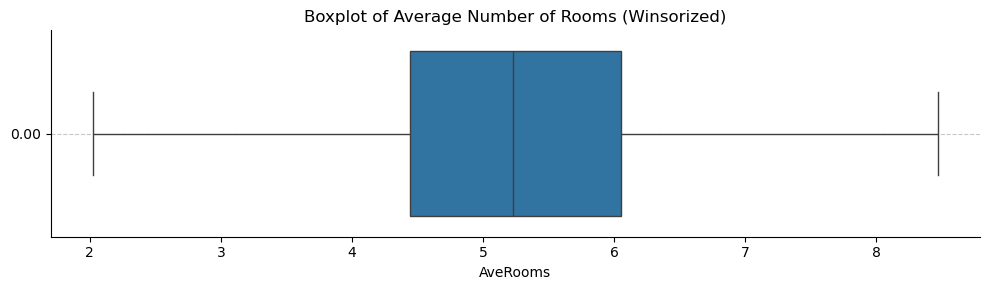

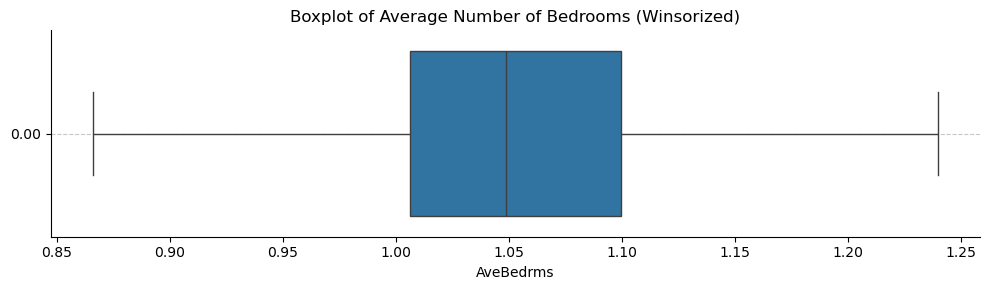

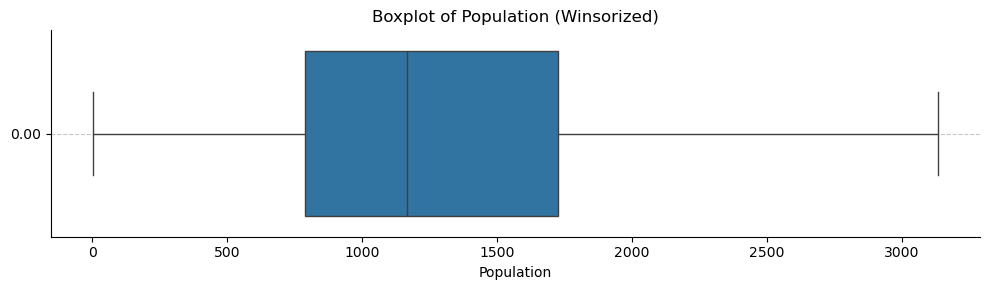

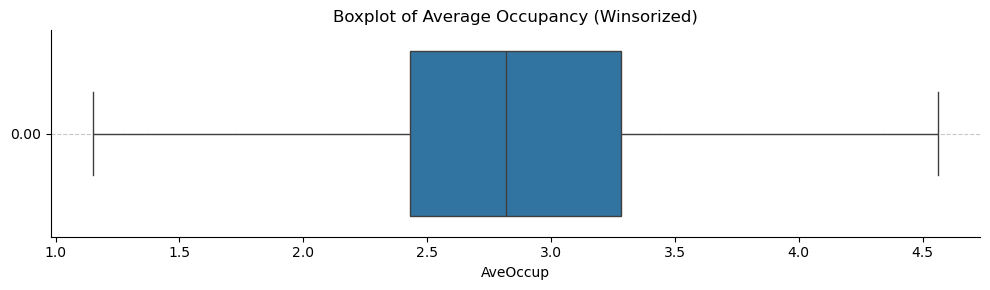

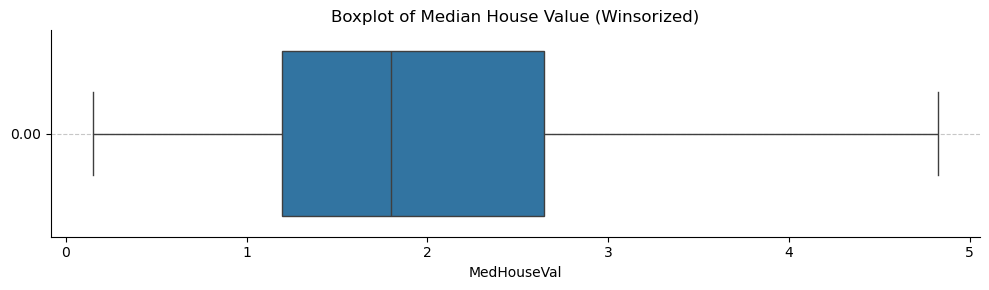

In [11]:
# Replot after winsorization
columns_to_plot = [
    ('AveRooms', 'Boxplot of Average Number of Rooms (Winsorized)'),
    ('AveBedrms', 'Boxplot of Average Number of Bedrooms (Winsorized)'),
    ('Population', 'Boxplot of Population (Winsorized)'),
    ('AveOccup', 'Boxplot of Average Occupancy (Winsorized)'),
    ('MedHouseVal', 'Boxplot of Median House Value (Winsorized)')
]

for col, title in columns_to_plot:
    plot_boxplot_in_millions(winsorized_df, col, title)

### Step 3(g): Check for Skewness Using Histograms

Skewed data can mislead statistical modeling and reduce the reliability of predictions. It’s essential to examine the distribution of features using histograms to identify any skewed or heavily tailed variables.

In this step, distribution plots are created for numerical features like `MedHouseVal`, `MedInc`, `AveOccup`, and `Population`, along with vertical lines showing their **mean** and **median**. This helps visually assess the **symmetry** of each feature:

- If the **mean ≈ median**, the distribution is roughly symmetric (normal).
- If the **mean > median**, the distribution is **right-skewed**.
- If the **mean < median**, it’s **left-skewed**.

This visual check helps decide whether a transformation (e.g., log, Box-Cox) is necessary before modeling.

**MedHouseVal** and **MedInc** show moderate **right skewness**, indicating a concentration of lower values with a tail on the higher end.

**AveOccup** and **Population** are heavily **right-skewed**, with extreme outliers and a long tail — suggesting these features may benefit from log transformation to normalize the data for modeling.

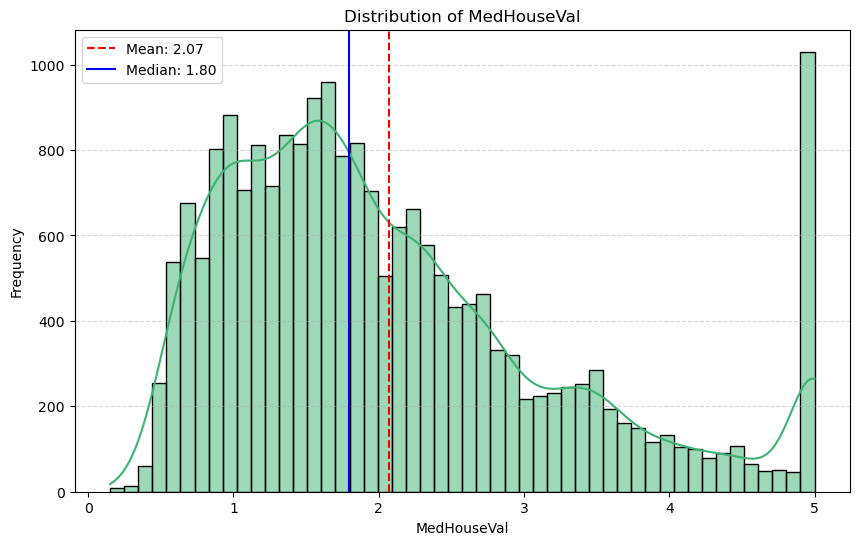

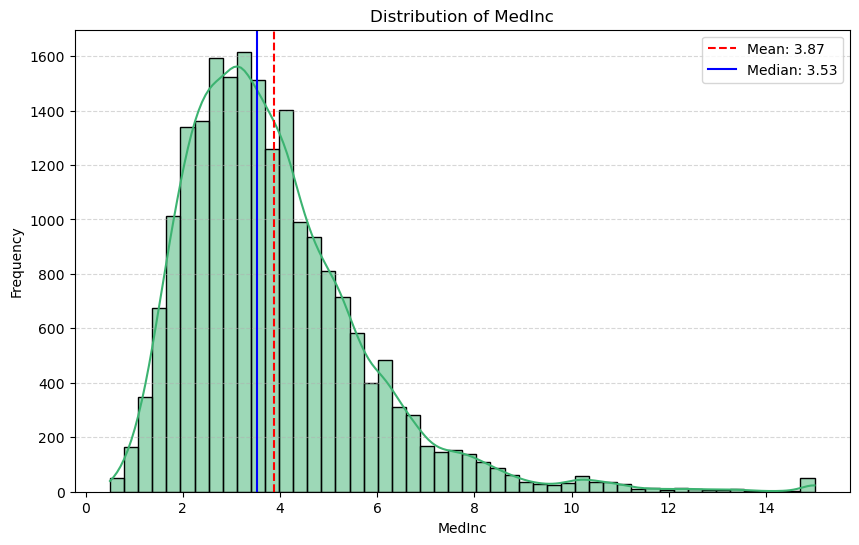

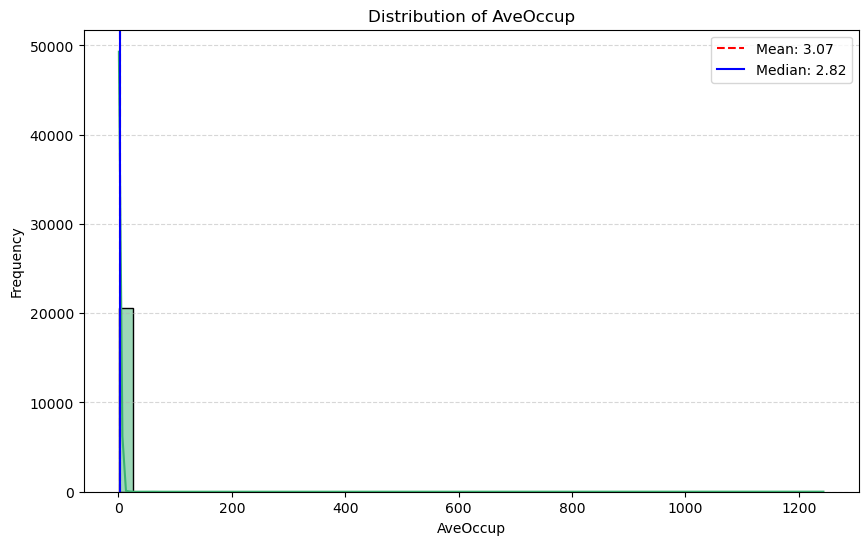

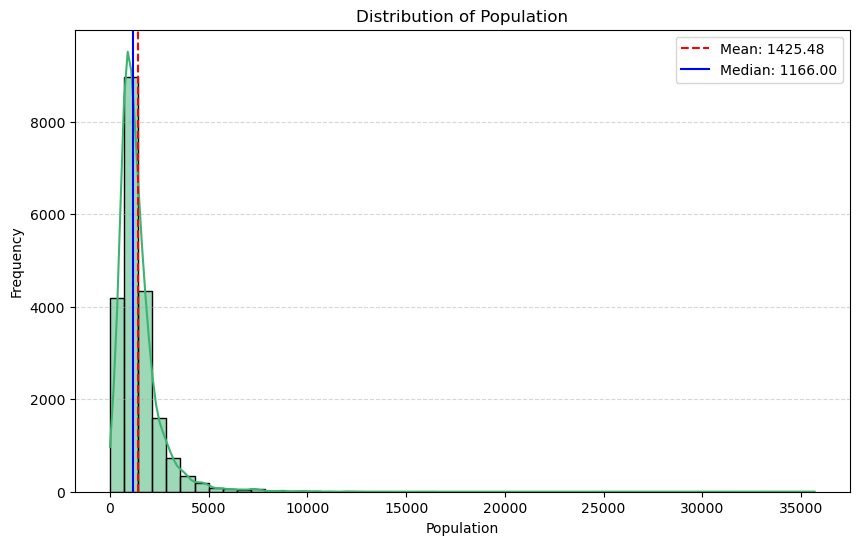

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_with_stats(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=50, color='mediumseagreen')

    # Add mean and median lines
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')
    
    # Labels and legend
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Apply on relevant features
columns_to_check = ['MedHouseVal', 'MedInc', 'AveOccup', 'Population']
for col in columns_to_check:
    plot_distribution_with_stats(california_df, col)

### Step 3(h): Handle Skewness with Log Transformation

Many machine learning algorithms assume that input features are normally distributed. However, several features in the California Housing dataset exhibit significant right skew, including:

- `Population`
- `AveOccup`
- `MedInc`
- `AveRooms`
- `AveBedrms`

To reduce skewness and improve model performance, we apply a **log transformation** using `np.log1p()`, which calculates `log(1 + x)`. This transformation:

- Compresses extreme values
- Reduces the influence of outliers
- Helps approximate a normal distribution

Each transformed feature is saved with a `_log` suffix. The histograms below confirm the improved distribution shape post-transformation.

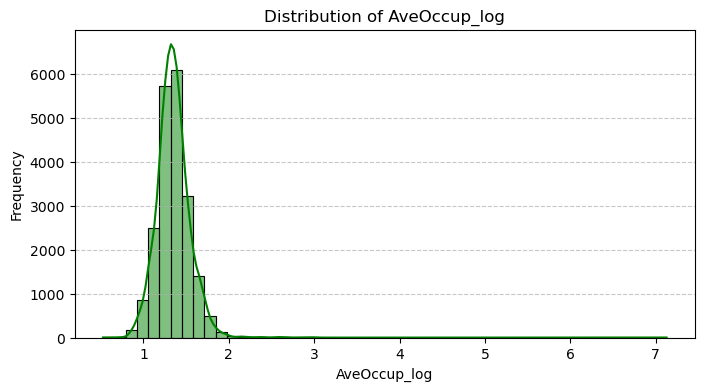

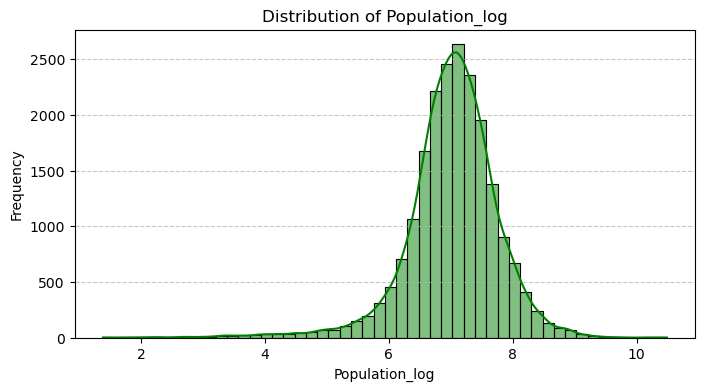

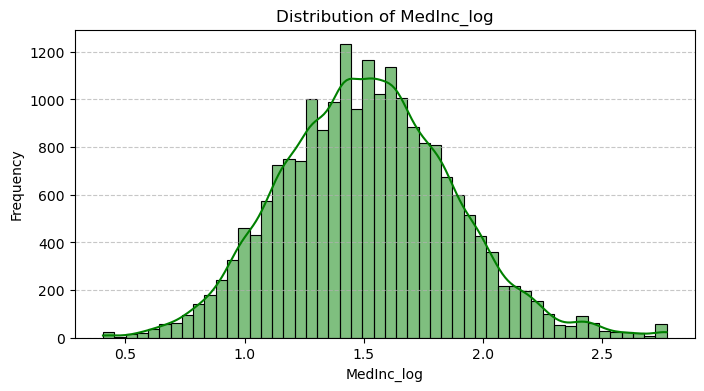

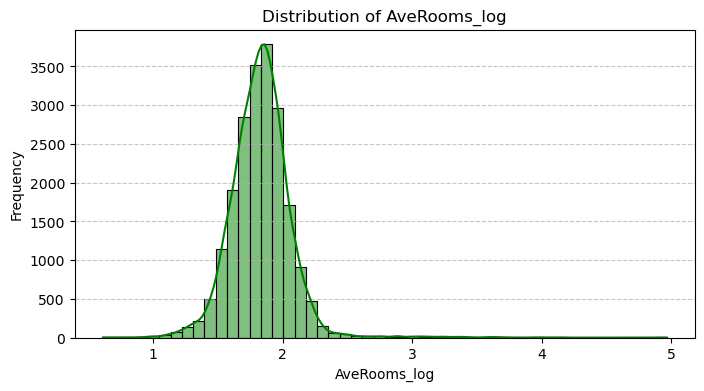

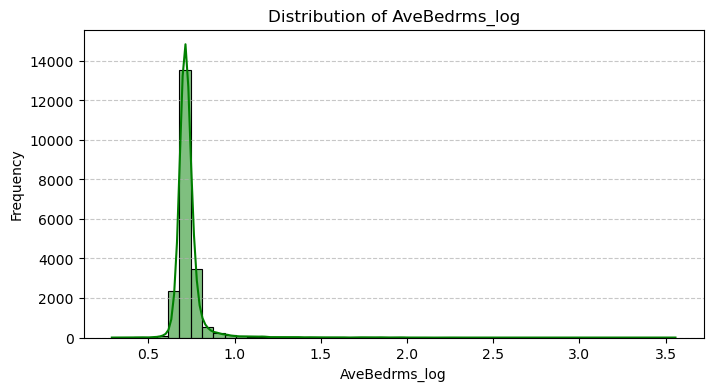

In [13]:
# List of skewed features to log transform
skewed_features = ['AveOccup', 'Population', 'MedInc', 'AveRooms', 'AveBedrms']

# Apply log1p (log(1 + x)) transformation and store in new columns
for col in skewed_features:
    transformed_col = f'{col}_log'
    california_df[transformed_col] = np.log1p(california_df[col])

# Plot histograms to visualize post-transformation distribution
for col in skewed_features:
    log_col = f'{col}_log'
    plt.figure(figsize=(8, 4))
    sns.histplot(california_df[log_col], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {log_col}')
    plt.xlabel(log_col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Step 3(h): Create a Vertical Correlation Heatmap

The correlation matrix displays the linear relationship between each pair of numerical features in the dataset. A correlation value ranges between -1 and 1:
- **+1** indicates a perfect positive linear relationship,
- **-1** indicates a perfect negative linear relationship,
- **0** implies no linear relationship.

This heatmap highlights how each variable correlates with the target variable `MedHouseVal`.

F#### Key Observations from the Heatmap:
- **MedInc (0.69)** and **MedInc_log (0.67)** still show the strongest positive correlation with house value, indicating income is a key predictor, even after transformation.
- **AveRooms_log (0.24)** now shows better correlation than the raw **AveRooms (0.15)**, a sign the log transformation improved linearity.
- **AveOccup_log (-0.25)** has a more pronounced negative correlation than raw **AveOccup (-0.02)**, revealing potential hidden patterns.
- **Other features** like `HouseAge`, `Latitude`, and `Longitude` remain weakly correlated even after transformation.

This step helps prioritize feature importance before modeling.


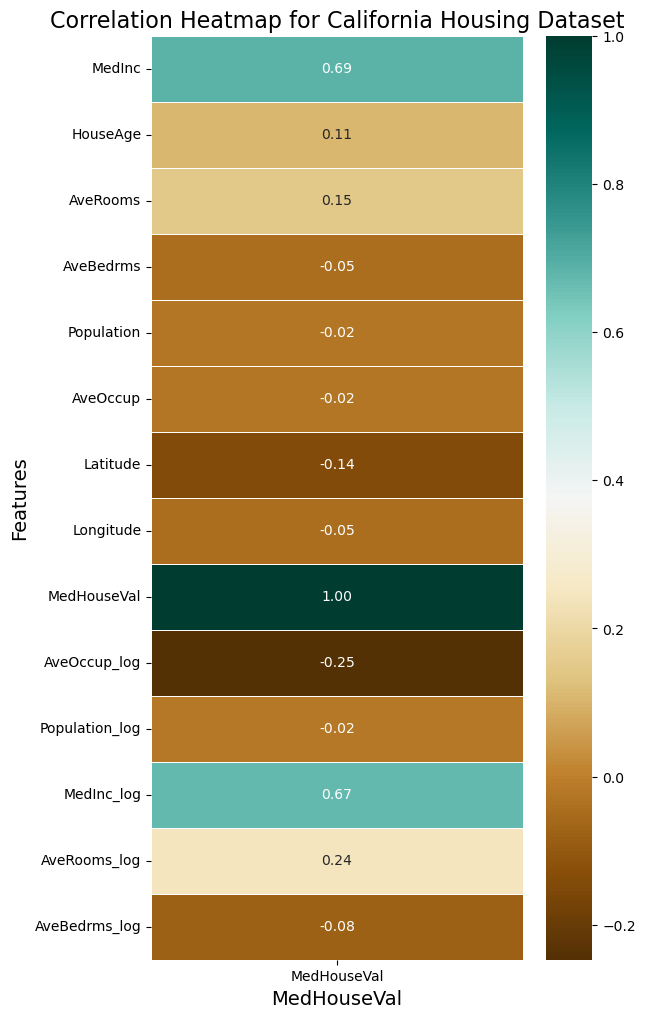

In [14]:
# Calculate the correlation matrix
corr_matrix = california_df.corr()

# Set the plot size
fig, ax = plt.subplots(figsize=(6, 12))

# Create a vertical heatmap
sns.heatmap(corr_matrix[['MedHouseVal']], cmap='BrBG', annot=True, fmt='.2f',
            linewidths=0.5, ax=ax, cbar=True)

# Set the title and axis labels
ax.set_title('Correlation Heatmap for California Housing Dataset', fontsize=16)
ax.set_xlabel('MedHouseVal', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Rotate x-axis label for readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show plot
plt.show()

### Step 3(i): Perform Feature Scaling

Feature scaling transforms numerical features so they have similar scales or ranges of values. This is especially important for models like linear regression because the coefficients directly relate to the scale of the input features. Standardization (z-score scaling) is commonly used, where each feature is rescaled to have a mean of 0 and a standard deviation of 1.

In our case, scaling ensures that no feature dominates others due to differing units or magnitudes, making the regression coefficients more interpretable and the model more stable.

In [15]:
scaler = StandardScaler()
california_df_scaled = scaler.fit_transform(california_df)

# Convert back to DataFrame for readability
california_df_scaled = pd.DataFrame(california_df_scaled, columns=california_df.columns)

### Step 3(j): Check for Assumptions using Scatter Plots

To validate the assumption of linearity in linear regression, we create scatter plots between the target variable (`MedHouseVal`) and other features.

#### Observations:
- **MedInc vs Median House Value**: Shows a strong positive linear relationship. As median income increases, median house value tends to rise. This feature is a strong predictor.
- **AveRooms, AveBedrms, AveOccup, Population**: These features are highly **right-skewed** with **significant outliers**, indicating the presence of extreme values that may distort regression modeling.
- **Latitude & Longitude**: These features show clustered vertical bands, implying possible location-based segmentation, but no clear linear trend with house value.
- **HouseAge**: Uniformly distributed across the x-axis with no strong trend—its predictive power may be limited.
  
Overall, **MedInc** stands out as the most useful feature for predicting house value, while other variables may require transformation or deeper geographic feature engineering.

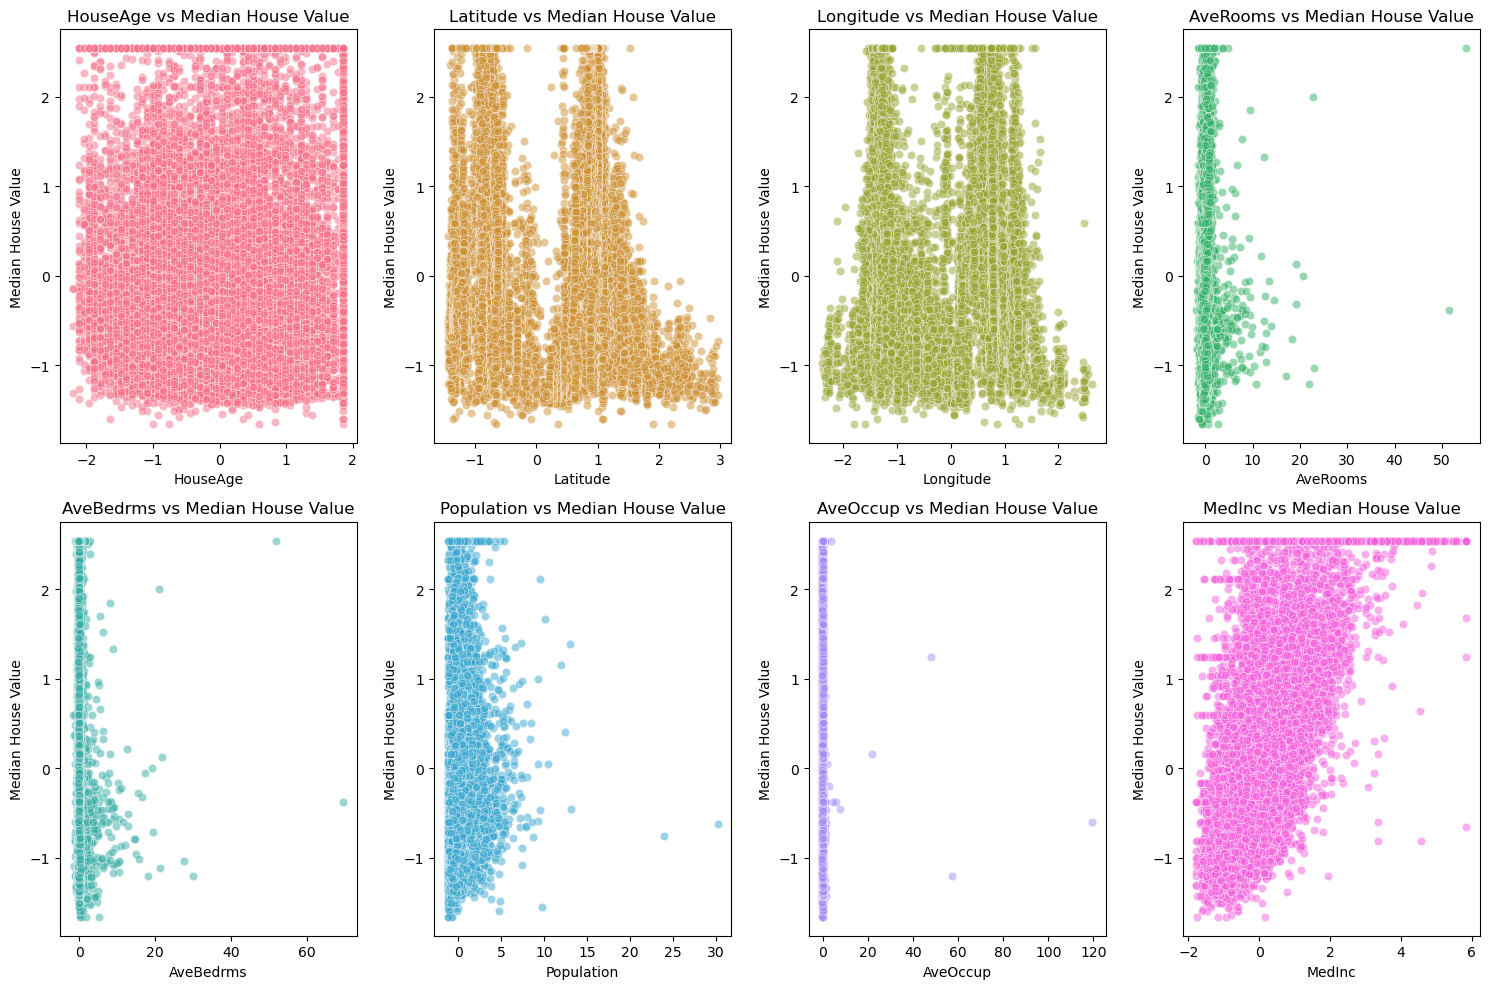

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the columns to plot (excluding the empty one)
features = ['HouseAge', 'Latitude', 'Longitude', 'AveRooms',
            'AveBedrms', 'Population', 'AveOccup', 'MedInc']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

# Use a color palette
palette = sns.color_palette("husl", len(features))

# Scatter plots
for idx, feature in enumerate(features):
    sns.scatterplot(
        ax=axes[idx],
        x=california_df_scaled[feature],
        y=california_df_scaled['MedHouseVal'],
        color=palette[idx],
        alpha=0.5
    )
    axes[idx].set_title(f"{feature} vs Median House Value")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Median House Value")

plt.tight_layout()
plt.show()


### Step 4: Define Dependent and Independent Variables

We select `'MedHouseVal'` as the dependent variable (target), and use the remaining scaled features as independent variables to prepare for regression.

In [17]:
X = california_df_scaled.drop(['MedHouseVal'], axis=1)
y = california_df_scaled['MedHouseVal']

### Step 5: Split Data into Training and Testing Sets (70:30)

Splitting the dataset helps evaluate the model's ability to generalize to unseen data. We use a 70-30 train-test ratio.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Step 6 (Optimized): Search for Best Polynomial Degree (1 to 5)

To improve runtime efficiency, we limit our polynomial degree search to the range of 1 to 5. Higher degrees tend to introduce unnecessary complexity and significantly increase computational cost without meaningful performance gains. 

For each degree, we:
- Generate polynomial features using `PolynomialFeatures`.
- Fit a `LinearRegression` model.
- Evaluate the model using R² score and RMSE.
- Retain the best-performing model based on R² score.

This approach finds an optimal trade-off between model complexity and prediction accuracy.

In [19]:
# Initialize tracking variables
best_model = None
best_score = -np.inf
best_degree = 0
best_rmse = None

# Restrict polynomial degree to 1 through 5 for faster computation
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    score = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    if score > best_score:
        best_model = model
        best_score = score
        best_degree = degree
        best_rmse = rmse
        best_poly = poly

### Step 7: Evaluate and Visualize the Best Model

We plot the actual vs predicted values to assess model performance visually. A tighter clustering along the diagonal line indicates better predictive performance.

Best Polynomial Degree: 1
R² Score on Test Set: 0.65
Root Mean Squared Error (RMSE): 0.58


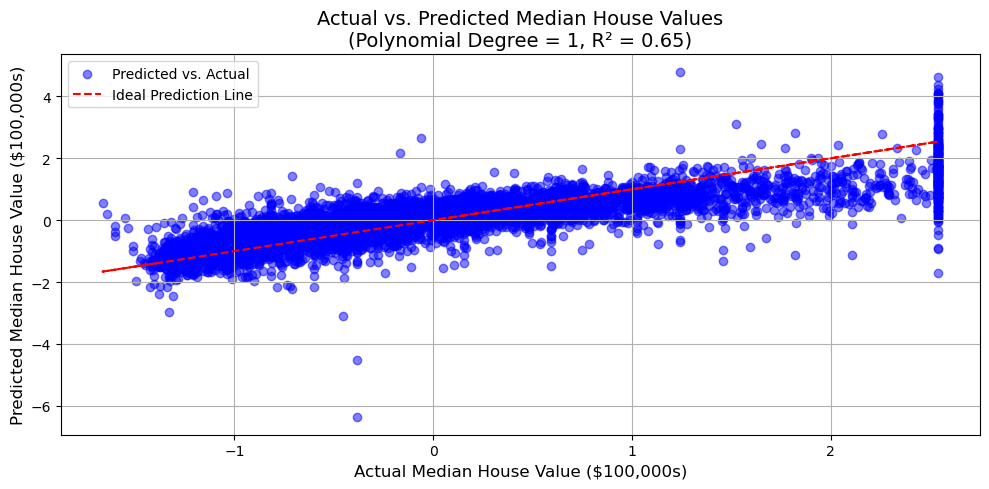

In [20]:
# Predictions using the best model
y_pred = best_model.predict(best_poly.transform(X_test))

# Print evaluation metrics
print(f"Best Polynomial Degree: {best_degree}")
print(f"R² Score on Test Set: {best_score:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_rmse:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Prediction Line')

plt.title(f'Actual vs. Predicted Median House Values\n(Polynomial Degree = {best_degree}, R² = {best_score:.2f})', fontsize=14)
plt.xlabel('Actual Median House Value ($100,000s)', fontsize=12)
plt.ylabel('Predicted Median House Value ($100,000s)', fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

From the above scatter plot comparing actual vs. predicted values, we observe the following:

- The model achieved an R² score of **0.65**, indicating that **65% of the variance in median house values** is explained by the polynomial regression model.
- The red dashed line represents the **ideal prediction line** (where predicted = actual). The scatter points (in blue) are **closely aligned but not perfectly** along this line, suggesting a moderate fit.
- Some deviation and dispersion are observed, especially at the extreme ends of the distribution, which may be due to outliers or model limitations.

Overall, using a **polynomial degree of 1 (linear regression)** provided a reasonable approximation of the relationship between the predictors and house prices. However, for more complex relationships, **higher-degree polynomials or alternative models (e.g., decision trees, gradient boosting)** may yield improved performance.